In [507]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.multioutput import MultiOutputRegressor
from math import isnan
import pprint
file = pd.read_csv("cs210_capstone_project.csv")

In [746]:
df = pd.DataFrame(file)
pd.set_option('display.max_rows', None)
# df = df.drop(columns=["mth109grade", "mth112grade"])
len(df)

479

In [834]:
grades = {'A':4.0, 'P':4.0, 'B':3.0, 'C':2.0, 'D':1.0, 'F':0.0, 'IN':None, 'W':None}
complete_df = df
for i in grades:
    complete_df = complete_df.replace([str(i)], grades[i])
print(complete_df)
complete_df['Student'] = range(0, len(complete_df))
complete_df = complete_df.set_index('Student')
complete_df_with_nans = complete_df
complete_df_up_to_210 = complete_df.drop(columns=['cs220grade', 'cs370grade', 'cs390grade', 'mth112grade', 'mth109grade'])
complete_df = complete_df.dropna()
complete_df_with_nans

    cs210grade cs101grade cs102grade cs140grade cs220grade cs370grade  \
0          3.0        NaN        NaN        NaN        3.0        NaN   
1          3.0        NaN        3.0        2.0        2.0        4.0   
2          2.0        3.0        3.0        2.0        NaN        NaN   
3          3.0        4.0        4.0        4.0        NaN        2.0   
4          2.0        3.0        2.0        1.0        2.0        NaN   
5          3.0        NaN        NaN        3.0        4.0        4.0   
6          4.0        4.0        4.0        4.0        NaN        NaN   
7          2.0        2.0        4.0        2.0        3.0        3.0   
8          3.0        3.0        2.0        2.0        3.0        2.0   
9          4.0        NaN        4.0        3.0        4.0        2.0   
10         3.0        2.0        2.0        1.0        4.0        2.0   
11         3.0        4.0        4.0        3.0        2.0        NaN   
12         2.0        NaN        3.0        3.0    

,cs210grade,cs101grade,cs102grade,cs140grade,cs220grade,cs370grade,cs390grade,mth109grade,mth112grade,mth120grade
Student,,,,,,,,,,
0,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
1,3.0,NaN,3.0,2.0,2.0,4.0,4.0,NaN,NaN,3.0
2,2.0,3.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0
3,3.0,4.0,4.0,4.0,NaN,2.0,NaN,NaN,NaN,NaN
4,2.0,3.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0
5,3.0,NaN,NaN,3.0,4.0,4.0,3.0,NaN,NaN,2.0
6,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,2.0,2.0,4.0,2.0,3.0,3.0,3.0,NaN,NaN,3.0
8,3.0,3.0,2.0,2.0,3.0,2.0,NaN,NaN,NaN,0.0


In [941]:
### Just in case all of one column is NaN's
NaN_classes = []
max_NaN = 0
nan_sum = []
NaN_class = ""
for i in df.columns:
    null_sum = df[i].isnull().sum()
    nan_sum.append(null_sum)
    if null_sum == len(df[i]):
        NaN_classes += [str(i)]
    if null_sum > max_NaN:
        max_NaN = null_sum
        NaN_class = i

print("nan's per class:", nan_sum)
print(df.columns)
print("Class with the most NaN vals: ", NaN_class, ",", max_NaN)
print("Total students:", len(df))

nan's per class: [0, 108, 58, 51, 67, 116, 195, 453, 438, 106]
Index(['cs210grade', 'cs101grade', 'cs102grade', 'cs140grade', 'cs220grade',
       'cs370grade', 'cs390grade', 'mth109grade', 'mth112grade',
       'mth120grade'],
      dtype='object')
Class with the most NaN vals:  mth109grade , 453
Total students: 479


In [836]:
# knn = KNeighborsClassifier()
# X = complete_df.drop("cs210grade", axis = 1)
# y = complete_df["cs210grade"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=4)
# k_range = range(1,50)

# accuracies = []
# max_accuracies = []
# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train, y_train)
#     pred_k = knn.predict(X_test)
#     accuracies.append(1- (np.mean(pred_k != y_test)))
    
# plt.plot(k_range, accuracies, color='blue', linestyle='dashed', 
#          marker='o', markerfacecolor='red', markersize=10)
# plt.title("Accuracy vs. K Value")
# plt.xlabel("Value of K for KNN")
# plt.ylabel("Accuracy")
# plt.show()

# # This is our K
# K = np.argmax(accuracies) + 1
# print("Highest performing K is: ", K)

In [837]:
knn = KNeighborsClassifier(n_neighbors=K, p=2)
knn.fit(X_train, y_train)
pred_k = knn.predict(X_test)
print(pred_k)
print(np.array(y_test))
print(knn.score(X_test, y_test))

[4. 3. 4. 4. 2. 3. 4. 3. 2. 4. 4. 2. 4. 2. 2. 3. 4. 4. 4. 4. 4. 2. 4. 3.
 3. 3. 3. 2. 2. 3. 3. 2. 4. 3. 4. 3. 3. 3. 4. 2. 4. 3. 4. 2.]
[4. 3. 4. 4. 2. 2. 4. 3. 3. 4. 3. 2. 4. 3. 2. 3. 4. 4. 4. 4. 3. 2. 4. 3.
 2. 2. 3. 2. 2. 2. 3. 0. 2. 3. 4. 2. 3. 3. 4. 2. 4. 3. 4. 1.]
0.7272727272727273


In [936]:
def pred_grades(class_to_pred, student, df):
    student_grades = final_df[student:student+1]
    student_grades = student_grades.dropna(axis=1)
    df = df.drop([student])
    column_list = []
    for col in df:
        if col not in student_grades.columns and col not in class_to_pred:
            column_list.append(col)
    print("Other classes not taken yet and being removed from prediction model:", column_list)
    
    df = df.drop(columns=column_list)
    df = df.dropna()
#     print(grades_copy)
    pred_using_knn(df, class_to_pred, student_grades)
    
    

def grades_df_to_dict(grades_df):
    grades_df = grades_df.dropna(axis=1)
    grades_dict = grades_df.to_dict('records')
     
    return grades_dict[0]

def get_gpas(df):
    df_dict = df.to_dict('index')
    grades = {}
    real_vals = 0
    for i in df_dict:
        gpa = 0
        real_vals = 0
        for j in df_dict[i]:
            if not pd.isna(df_dict[i][j]):
                gpa += df_dict[i][j]
                real_vals += 1
        gpa /= real_vals
        grades[str(i)] = round(gpa, 2)
    gpas = pd.DataFrame.from_dict(grades, orient='index',columns=['GPA'])
    gpas['Student'] = range(0, len(gpas))
    gpas = gpas.set_index('Student')
    return gpas

def merge_dfs(df1, df2):
    return df1.merge(df2, how='inner', on='Student')



In [937]:
def pred_using_knn(df, class_name, grades_df):
    knn = KNeighborsClassifier()
    X = df.drop(class_name, axis = 1)
    y = df[class_name].astype('str')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=4)
    k_range = range(1,len(X_train))

    accuracies = []
    max_accuracies = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        pred_k = knn.predict(X_test)
        accuracies.append(1- (np.mean(pred_k != y_test)))
    
    plt.plot(k_range, accuracies, color='blue', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=10)
    plt.title("Accuracy vs. K Value")
    plt.xlabel("Value of K for KNN")
    plt.ylabel("Accuracy")
    plt.show()

    # This is our K
    K = np.argmax(accuracies) + 1
    print("Highest performing K is: ", K)
    print("Accuracy of", "{:.2%}".format(max(accuracies)))
    
    # Predicting on student
    X_test = grades_df
    knn = KNeighborsClassifier(n_neighbors=K, p=2)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    print("Predicted a grade of a", pred_k[0], "for", class_name)
    grades_df[class_name] = pred_k[0]
    
    new_gpa_calc = 0
    for i in grades_df:
        if i != 'GPA':
            new_gpa_calc += float(grades_df[i])
    new_gpa_calc /= (len(grades_df.columns)-1)
    grades_df['New GPA'] = new_gpa_calc
    grades_df = grades_df.reindex(sorted(grades_df.columns), axis=1)
    print(grades_df)

In [949]:
def script():
    answer = int(input("What would you like to do?\n1. Predict student's grade for one class\n2. Predict rest of student's grades for all classes not taken\n3. Predict all students' grades for one class\n4. Predict all students' grades for all classes\n"))
    if answer == 1:
        student = int(input("Which student would you like to predict for?(0-"+str(len(complete_df_with_nans))+ "): "))
        gpas = get_gpas(complete_df_with_nans)
        final_df = merge_dfs(complete_df_with_nans, gpas)
        final_df = final_df.reindex(sorted(final_df.columns), axis=1)
        student_grades = final_df[student:student+1]
        student_grades = student_grades.reindex(sorted(student_grades.columns), axis=1)
        print("\nStudent", student, "'s grades for each class: \n", student_grades, "\n")
        nan_classes = []
        for i in student_grades:
            if student_grades[i].isnull().sum():
                nan_classes.append(i)
        print("\nAvailable classes to predict: ", nan_classes)
        class_to_pred = str(input("\nWhich class would you like to predict?\n"))
        pred_grades(class_to_pred, student, final_df)
    if answer == 2:
        return 0
    if answer == 3:
        return 0
    if answer == 4:
        return 0

What would you like to do?
1. Predict student's grade for one class
2. Predict rest of student's grades for all classes not taken
3. Predict all students' grades for one class
4. Predict all students' grades for all classes
1
Which student would you like to predict for?(0-479): 305

Student 305 's grades for each class: 
           GPA cs101grade cs102grade cs140grade cs210grade cs220grade  \
Student                                                                
305      3.43        NaN        4.0        3.0        3.0        4.0   

        cs370grade cs390grade  mth109grade mth112grade mth120grade  
Student                                                             
305            4.0        3.0          NaN         NaN         3.0   


Available classes to predict:  ['cs101grade', 'mth109grade', 'mth112grade']

Which class would you like to predict?
cs101grade
Other classes not taken yet and being removed from prediction model: ['mth109grade', 'mth112grade']


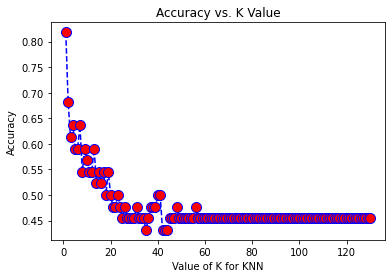

Highest performing K is:  1
Accuracy of 81.82%
Predicted a grade of a 4.0 for cs101grade
          GPA  New GPA cs101grade  cs102grade  cs140grade  cs210grade  \
Student                                                                 
305      3.43      3.5        4.0         4.0         3.0         3.0   

         cs220grade cs370grade cs390grade  mth120grade  
Student                                                 
305             4.0        4.0        3.0          3.0  


In [950]:
f = script()

In [952]:
final_df = final_df.reindex(sorted(final_df.columns), axis=1)
final_df

,GPA,cs101grade,cs102grade,cs140grade,cs210grade,cs220grade,cs370grade,cs390grade,mth109grade,mth112grade,mth120grade
Student,,,,,,,,,,,
0,3.00,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN
1,3.00,NaN,3.0,2.0,3.0,2.0,4.0,4.0,NaN,NaN,3.0
2,2.40,3.0,3.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0
3,3.40,4.0,4.0,4.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN
4,2.17,3.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,3.0
5,3.17,NaN,NaN,3.0,3.0,4.0,4.0,3.0,NaN,NaN,2.0
6,4.00,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,2.75,2.0,4.0,2.0,2.0,3.0,3.0,3.0,NaN,NaN,3.0
8,2.14,3.0,2.0,2.0,3.0,3.0,2.0,NaN,NaN,NaN,0.0
